In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
# dataset_name = 'juvenile'
# config_file = '../dataset_configs/juvenile_dataset.json'
dataset_name = 'juvenile_dfovf'
# dataset_name = 'juvenile_noise_std0p2'
dataset_name = 'juvenile_noise_std0p5'
config_file = f'../../{dataset_name}_dataset/notebooks/{dataset_name}_dataset.json'


from analysis_config import juvenile_window_name_to_frames, juvenile_capacity_window_name_to_M, juvenile_capacity_window_name_to_seed
# window_name = 'time_window_3s'
# window_name = 'time_window_5s'
window_name = 'time_window_7s'
window = juvenile_window_name_to_frames[window_name]
print(window_name, window)
window_tag = f'window_{window[0]}to{window[1]}'

M = juvenile_capacity_window_name_to_M[window_name]
seed = juvenile_capacity_window_name_to_seed[window_name]

import os
fig_dir = f'../figures/{dataset_name}/{window_name}/capacity'
os.makedirs(fig_dir, exist_ok=True)


time_window_7s [32, 85]


In [14]:
from matplotlib import rcParams
rcParams['font.family'] = 'Arial'
rcParams['pdf.fonttype'] = 42  # Use TrueType fonts
rcParams['axes.linewidth'] = 0.5
rcParams['xtick.major.width'] = 0.5
rcParams['ytick.major.width'] = 0.5

In [15]:
import sys
import os
import pandas as pd
import numpy as np
from os.path import join as pjoin

from catrace.stats import sort_conditions, pool_training_conditions
from catrace.visualize import plot_measure, plot_all_measures

In [16]:
import sys
import os
import pandas as pd
from os.path import join as pjoin

from catrace.dataset import load_dataset_config
window_key = f'window_{window[0]}_{window[1]}'
N=700 # number of neurons

dsconfig= load_dataset_config(config_file)
capacity_dir = os.path.join(dsconfig.results_dir, 'capacity')

jobname = f'capacity_sweep_{window_key}_N{N}_M{M}_master_seed{seed}'
# Load the capacity dataframe
import pandas as pd

input_dir = pjoin(capacity_dir, jobname)
exp_list = dsconfig.exp_list
conditions = dsconfig.conditions

# If file exists, load it
df_result_file = pjoin(input_dir, f'df_result.pkl')
df_result = pd.read_pickle(df_result_file)


def rename_odor_index_levels(df_per_fish):
    df_per_fish.reset_index(level=['odor_0', 'odor_1'], inplace=True)
    # Rename columns odor_0 to odor1 and odor_1 to odor2
    df_per_fish.rename(columns={'odor_0': 'odor1', 'odor_1': 'odor2'}, inplace=True)
    # Set odor1 and odor2 as index
    df_per_fish.set_index(['odor1', 'odor2'], inplace=True, append=True)
    return df_per_fish

if 'odor_0' in df_result.index.names:
    df_per_fish_juv = df_result.xs(False, level='shuffle').groupby(['fish_id', 'condition', 'odor_0', 'odor_1'], sort=False).mean()
    df_per_fish_juv_shuffled = df_result.xs(True, level='shuffle').groupby(['fish_id', 'condition', 'odor_0', 'odor_1'], sort=False).mean()

    df_per_fish_juv = rename_odor_index_levels(df_per_fish_juv)
    df_per_fish_juv_shuffled = rename_odor_index_levels(df_per_fish_juv_shuffled)
else:
    df_per_fish_juv = df_result.xs(False, level='shuffle').groupby(['fish_id', 'condition', 'odor1', 'odor2'], sort=False).mean()
    df_per_fish_juv_shuffled = df_result.xs(True, level='shuffle').groupby(['fish_id', 'condition', 'odor1', 'odor2'], sort=False).mean()

juv_conditions =  ['naive', 'arg-phe', 'phe-arg', 'phe-trp']
cond_mapping = {'naive': 'naive', 'phe-arg': 'trained', 'arg-phe': 'trained', 'phe-trp': 'trained'}
conditions_pooled = ['naive', 'trained']

df_pooled = pool_training_conditions(df_per_fish_juv, cond_mapping)

df_pooled_shuffled = pool_training_conditions(df_per_fish_juv_shuffled, cond_mapping)


## Juvenile
### All odor pairs

[('Phe', 'Trp'), ('Arg', 'Trp'), ('Arg', 'GCA'), ('GCA', 'TCA'), ('TCA', 'Trp'), ('Phe', 'TDCA'), ('Arg', 'TDCA'), ('Arg', 'Phe'), ('TDCA', 'Trp'), ('GCA', 'Trp'), ('TCA', 'TDCA'), ('Phe', 'TCA'), ('Arg', 'TCA'), ('GCA', 'TDCA'), ('GCA', 'Phe')]
[('Phe', 'Trp'), ('Arg', 'Trp'), ('Arg', 'GCA'), ('GCA', 'TCA'), ('TCA', 'Trp'), ('Phe', 'TDCA'), ('Arg', 'TDCA'), ('Arg', 'Phe'), ('TDCA', 'Trp'), ('GCA', 'Trp'), ('TCA', 'TDCA'), ('Phe', 'TCA'), ('Arg', 'TCA'), ('GCA', 'TDCA'), ('GCA', 'Phe')]


[('Phe', 'Trp'), ('Arg', 'Trp'), ('Arg', 'GCA'), ('GCA', 'TCA'), ('TCA', 'Trp'), ('Phe', 'TDCA'), ('Arg', 'TDCA'), ('Arg', 'Phe'), ('TDCA', 'Trp'), ('GCA', 'Trp'), ('TCA', 'TDCA'), ('Phe', 'TCA'), ('Arg', 'TCA'), ('GCA', 'TDCA'), ('GCA', 'Phe')]
[('Phe', 'Trp'), ('Arg', 'Trp'), ('Arg', 'GCA'), ('GCA', 'TCA'), ('TCA', 'Trp'), ('Phe', 'TDCA'), ('Arg', 'TDCA'), ('Arg', 'Phe'), ('TDCA', 'Trp'), ('GCA', 'Trp'), ('TCA', 'TDCA'), ('Phe', 'TCA'), ('Arg', 'TCA'), ('GCA', 'TDCA'), ('GCA', 'Phe')]
[('Phe', 'Trp'), ('Arg', 'Trp'), ('Arg', 'GCA'), ('GCA', 'TCA'), ('TCA', 'Trp'), ('Phe', 'TDCA'), ('Arg', 'TDCA'), ('Arg', 'Phe'), ('TDCA', 'Trp'), ('GCA', 'Trp'), ('TCA', 'TDCA'), ('Phe', 'TCA'), ('Arg', 'TCA'), ('GCA', 'TDCA'), ('GCA', 'Phe')]
[('Phe', 'Trp'), ('Arg', 'Trp'), ('Arg', 'GCA'), ('GCA', 'TCA'), ('TCA', 'Trp'), ('Phe', 'TDCA'), ('Arg', 'TDCA'), ('Arg', 'Phe'), ('TDCA', 'Trp'), ('GCA', 'Trp'), ('TCA', 'TDCA'), ('Phe', 'TCA'), ('Arg', 'TCA'), ('GCA', 'TDCA'), ('GCA', 'Phe')]
[('Phe', 'Trp'),

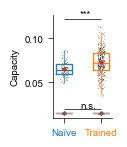

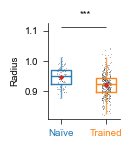

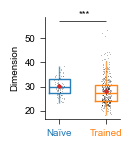

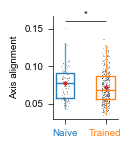

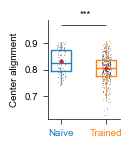

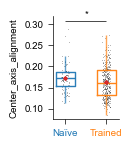

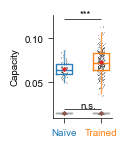

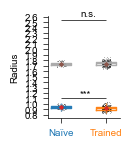

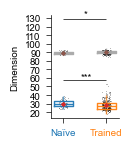

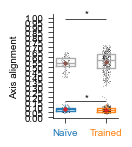

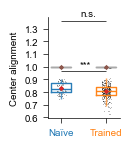

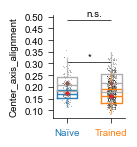

In [17]:
from catrace.for_paper import save_figure_for_paper, save_stats_json
from catrace.capacity_utils import plot_cap_and_save
from catrace.visualize import PlotBoxplotParams


plot_measure_params = PlotBoxplotParams(
    figsize=(1.4, 1.55),
    y_tick_label_fontsize=7,
    x_tick_label_fontsize=6,
    box_linewidth=1,
    mean_marker_size=0.7,
    strip_size=0.5,
    pvalue_bar_linewidth=0.5,
    box_colors=['tab:blue', 'tab:orange'],
    do_capitalize_labels=True,
)


capacity_ylim = None #(0, 0.18)
tick_intervals = [0.05, 0.1, 5, 0.05, 0.1, 0.05]
if dataset_name == 'juvenile_dfovf' or dataset_name == 'juvenile_noise_std0p5':
    tick_intervals[2] = 10
juv_pooled_conditions = ['naive', 'trained']

vsname = 'all_vs_all'
odor1_group = ['Phe', 'Trp', 'Arg', 'TDCA', 'TCA', 'GCA']
odor2_group = ['Phe', 'Trp', 'Arg', 'TDCA', 'TCA', 'GCA']

test_results_dict = plot_cap_and_save(vsname, odor1_group, odor2_group,
                    df_pooled,
                    df_pooled_shuffled,
                    juv_pooled_conditions,
                    dataset_name,
                    fig_dir,
                    plot_measure_params,
                    tick_intervals,
                    capacity_ylim=capacity_ylim,
                    do_save=True)



test_results_dict = plot_cap_and_save(vsname, odor1_group, odor2_group,
                    df_pooled,
                    df_pooled_shuffled,
                    juv_pooled_conditions,
                    dataset_name,
                    fig_dir,
                    plot_measure_params,
                    tick_intervals,
                    capacity_ylim=capacity_ylim,
                    do_save=True,
                    do_plot_shuffled_measure=True,)

In [18]:
from catrace.stats import format_test_results_pair


def format_capacity_test_results_dict(test_results_dict):
    for measure_name, test_results in test_results_dict.items():
        print(measure_name)

        print(format_test_results_pair(test_results['raw']))
        if 'shuffled' in test_results:
            print('shuffled')
            print(format_test_results_pair(test_results['shuffled']))

format_capacity_test_results_dict(test_results_dict)

capacity
Comparing naive (mean = 0.0651 ± 0.00837, n = 90) vs trained (mean = 0.0727 ± 0.0141, n = 375): Mann–Whitney U test, U = 10701.00, P = 6.9 × 10^-8.
shuffled
Comparing naive (mean = 0.0142 ± 4.61e-05, n = 90) vs trained (mean = 0.0142 ± 5.49e-05, n = 375): Mann–Whitney U test, U = 16257.00, P = 0.590.
radius
Comparing naive (mean = 0.95 ± 0.0300, n = 90) vs trained (mean = 0.92 ± 0.0389, n = 375): Mann–Whitney U test, U = 23722.00, P = 2.2 × 10^-9.
shuffled
Comparing naive (mean = 1.73 ± 0.0308, n = 90) vs trained (mean = 1.74 ± 0.0407, n = 375): Mann–Whitney U test, U = 15166.00, P = 0.136.
dimension
Comparing naive (mean = 30.09 ± 3.53, n = 90) vs trained (mean = 28.26 ± 5.61, n = 375): Mann–Whitney U test, U = 22027.00, P = 6.8 × 10^-6.
shuffled
Comparing naive (mean = 89.44 ± 1.46, n = 90) vs trained (mean = 89.80 ± 1.68, n = 375): Mann–Whitney U test, U = 14430.00, P = 0.033.
axis_alignment
Comparing naive (mean = 0.0782 ± 0.0220, n = 90) vs trained (mean = 0.0729 ± 0.0213

### AvsA, AvsB, BvsB


In [19]:
vsdict = {
    'AvsA': (['Phe', 'Trp', 'Arg'], ['Phe', 'Trp', 'Arg']),
    'AvsB': (['Phe', 'Trp', 'Arg'], ['TDCA', 'TCA', 'GCA']),
    'BvsB': (['TDCA', 'TCA', 'GCA'], ['TDCA', 'TCA', 'GCA']),
}

from catrace.capacity_utils import get_per_vs
vsdff = get_per_vs(vsdict, df_pooled)
vsdff


[('Arg', 'Phe'), ('Phe', 'Trp'), ('Arg', 'Trp')]
[('Arg', 'GCA'), ('TCA', 'Trp'), ('Phe', 'TDCA'), ('Arg', 'TDCA'), ('TDCA', 'Trp'), ('GCA', 'Trp'), ('Phe', 'TCA'), ('Arg', 'TCA'), ('GCA', 'Phe')]
[('GCA', 'TDCA'), ('TCA', 'TDCA'), ('GCA', 'TCA')]


capacity  dimension  \
vsname fish_id                   odor1 odor2 condition                        
AvsA   2021-07-15-DpOBEM-N2_Dp   Phe   Trp   naive      0.056713  33.203143   
                                 Arg   Phe   naive      0.061578  29.986855   
                                       Trp   naive      0.066201  28.811562   
       2021-07-16-DpOBEM-N3_Dp   Phe   Trp   naive      0.059879  30.429505   
                                 Arg   Phe   naive      0.060252  29.670999   
...                                                          ...        ...   
BvsB   2021-11-27-DpOBEM-JH24_Dp GCA   TDCA  trained    0.067215  29.704885   
                                       TCA   trained    0.069552  28.699582   
       2021-11-26-DpOBEM-JH24_Dp TCA   TDCA  trained    0.064315  29.358091   
                                 GCA   TDCA  trained    0.065819  28.543543   
                                       TCA   trained    0.064050  29.348277   

                                                          radius   utility  \
vsname fish_id                   odor1 odor2 condition                       
AvsA   2021-07-15-DpOBEM-N2_Dp   Phe   Trp   naive      0.974019  0.915515   
                                 Arg   Phe   naive      0.980085  0.904035   
                                       Trp   naive      0.948478  0.902552   
       2021-07-16-DpOBEM-N3_Dp   Phe   Trp   naive      0.974080  0.886412   
                                 Arg   Phe   naive      0.994679  0.888140   
...                                                          ...       ...   
BvsB   2021-11-27-DpOBEM-JH24_Dp GCA   TDCA  trained    0.928092  0.923058   
                                       TCA   trained    0.922768  0.917336   
       2021-11-26-DpOBEM-JH24_Dp TCA   TDCA  trained    0.970584  0.914832   
                                 GCA   TDCA  trained    0.965964  0.905663   
                                       TCA   trained    0.972014  0.912411   

                                                        center_alignment  \
vsname fish_id                   odor1 odor2 condition                     
AvsA   2021-07-15-DpOBEM-N2_Dp   Phe   Trp   naive              0.854507   
                                 Arg   Phe   naive              0.869542   
                                       Trp   naive              0.827946   
       2021-07-16-DpOBEM-N3_Dp   Phe   Trp   naive              0.884530   
                                 Arg   Phe   naive              0.897753   
...                                                                  ...   
BvsB   2021-11-27-DpOBEM-JH24_Dp GCA   TDCA  trained            0.858215   
                                       TCA   trained            0.852269   
       2021-11-26-DpOBEM-JH24_Dp TCA   TDCA  trained            0.872493   
                                 GCA   TDCA  trained            0.865965   
                                       TCA   trained            0.881742   

                                                        axis_alignment  \
vsname fish_id                   odor1 odor2 condition                   
AvsA   2021-07-15-DpOBEM-N2_Dp   Phe   Trp   naive            0.093606   
                                 Arg   Phe   naive            0.099491   
                                       Trp   naive            0.084747   
       2021-07-16-DpOBEM-N3_Dp   Phe   Trp   naive            0.127958   
                                 Arg   Phe   naive            0.125273   
...                                                                ...   
BvsB   2021-11-27-DpOBEM-JH24_Dp GCA   TDCA  trained          0.061381   
                                       TCA   trained          0.061925   
       2021-11-26-DpOBEM-JH24_Dp TCA   TDCA  trained          0.104487   
                                 GCA   TDCA  trained          0.108416   
                                       TCA   trained          0.113845   

                                                        cente

In [20]:
vsdff_naive = vsdff.xs('naive', level='condition')
vsdff_trained = vsdff.xs('trained', level='condition')
vsdff_naive
measure_name = 'capacity'
from catrace.stats import apply_test_by_cond
vs_test_naive = apply_test_by_cond(vsdff_naive, measure_name, cond_name='vsname', return_all_pairs=True)
vs_test_trained = apply_test_by_cond(vsdff_trained, measure_name, cond_name='vsname', return_all_pairs=True)
from catrace.stats import format_test_results_by_cond
sentence = format_test_results_by_cond(vs_test_naive)
print('naive')
print(sentence)
from catrace.stats import format_test_results_by_cond
sentence = format_test_results_by_cond(vs_test_trained)
print('trained')
print(sentence)

  Contrast     A     B  Paired  Parametric         T        dof alternative  \
0   vsname  AvsA  AvsB   False        True -4.319462  58.291115   two-sided   
1   vsname  AvsA  BvsB   False        True  4.415797  34.000000   two-sided   
2   vsname  AvsB  BvsB   False        True  8.251702  52.512676   two-sided   

          p-unc       BF10    hedges  
0  6.162948e-05     388.36 -0.854596  
1  9.690731e-05    219.983  1.439223  
2  4.752233e-11  8.672e+08  1.702751  
  Contrast     A     B  Paired  Parametric          T         dof alternative  \
0   vsname  AvsA  AvsB   False        True  -2.876716  151.148419   two-sided   
1   vsname  AvsA  BvsB   False        True   6.985475  148.000000   two-sided   
2   vsname  AvsB  BvsB   False        True  11.453201  174.691237   two-sided   

          p-unc       BF10    hedges  
0  4.599864e-03      6.948 -0.348843  
1  8.964558e-11  8.744e+07  1.134933  
2  5.163861e-23  1.303e+22  1.300877  
naive
(Kruskal–Wallis test, n = 90, d.f. = 2, 

/tungstenfs/scratch/gfriedri/hubo/Ca_imaging/scripts/catrace/catrace/visualize.py:624: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_points = datadf.groupby(
/tmp/ipykernel_897475/144451567.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_xtick_labels)


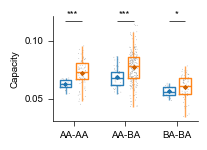

In [21]:


from catrace.visualize import (plot_measure_multi_odor_cond,
                               PlotBoxplotMultiOdorCondParams,
                               set_yticks_interval)

plot_box_multi_params = PlotBoxplotMultiOdorCondParams(
        figsize=(3.0, 1.6),
        label_fontsize=7,
        show_ns=True,
        strip_size=0.5,
        mean_marker_size=0.7,
        box_linewidth=1,
        pvalue_marker_xoffset=0.05,
        pvalue_bar_linewidth=0.5,
    )

measure_name = 'capacity'
fig, ax, test_results = plot_measure_multi_odor_cond(vsdff, measure_name, odor_name='vsname', condition_name='condition', params=plot_box_multi_params)

set_yticks_interval(ax, 0.05)

figname = f'{dataset_name}_{measure_name}_vsname_use_this_one'

ax = fig.get_axes()[0]
if ax.get_legend():
    ax.get_legend().remove()

ylabel = ax.get_ylabel()
ax.set_ylabel(ylabel.capitalize(), fontsize=7)

xtick_labels = ax.get_xticklabels()
mapping = {'AvsA': 'AA-AA', 'AvsB': 'AA-BA', 'BvsB': 'BA-BA'}
new_xtick_labels = [mapping[label.get_text()] for label in xtick_labels]
ax.set_xticklabels(new_xtick_labels)

save_figure_for_paper(fig, figname, fig_dir)
save_stats_json(test_results, figname, fig_dir, tuple_key_to_str=True)

In [22]:
from catrace.stats import format_test_results_multi_odor_two_cond
sentence = format_test_results_multi_odor_two_cond(test_results)
print(sentence)


For AvsA, Comparing naive (mean = 0.0626 ± 0.00403, n = 18) vs trained (mean = 0.0723 ± 0.0113, n = 75): Mann–Whitney U test, U = 257.00, P = 4.9 × 10^-5. For AvsB, Comparing naive (mean = 0.0688 ± 0.00796, n = 54) vs trained (mean = 0.0769 ± 0.0136, n = 225): Mann–Whitney U test, U = 3637.00, P = 4.7 × 10^-6. For BvsB, Comparing naive (mean = 0.0563 ± 0.00451, n = 18) vs trained (mean = 0.0602 ± 0.00986, n = 75): Mann–Whitney U test, U = 451.00, P = 0.030.
